In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
data=pd.read_excel("Data Sheet.xlsx")
print(data.head())

  Crash_Severity  Vehicle_Speed  Crash_Time  Age  Gender   Vehicle_Type  \
0   Minor injury            107          11   27    Male  Heavy Vehicle   
1   Minor injury             27          16   39    Male            Car   
2   Minor injury             87          14   42  Female            Car   
3   Minor injury             43           3   60  Female  Heavy Vehicle   
4   Minor injury             72           8   70    Male            T.W   

   Number_of_Lanes  Lane_Width Road_Type Alcohol_Consumption Crash_Type  \
0                2    3.484386     Urban                 Yes   Rear-end   
1                2    3.293091     Rural                 Yes   Rear-end   
2                3    3.218911     Urban                  No   Rear-end   
3                2    3.113012     Rural                  No   Rear-end   
4                3    3.106580     Urban                 Yes   Rear-end   

  Seatbelt_Usage  Speed_Limit Road_Surface_Condition  
0             No           30              

In [60]:
x=data.iloc[:,1:]
y=data.iloc[:,:1]

In [61]:
x.head()

,Vehicle_Speed,Crash_Time,Age,Gender,Vehicle_Type,Number_of_Lanes,Lane_Width,Road_Type,Alcohol_Consumption,Crash_Type,Seatbelt_Usage,Speed_Limit,Road_Surface_Condition
0,107,11,27,Male,Heavy Vehicle,2,3.484386,Urban,Yes,Rear-end,No,30,Icy
1,27,16,39,Male,Car,2,3.293091,Rural,Yes,Rear-end,Yes,110,Dry
2,87,14,42,Female,Car,3,3.218911,Urban,No,Rear-end,No,59,Dry
3,43,3,60,Female,Heavy Vehicle,2,3.113012,Rural,No,Rear-end,No,73,Wet
4,72,8,70,Male,T.W,3,3.106580,Urban,Yes,Rear-end,Yes,42,Wet


In [62]:
x.columns

Index(['Vehicle_Speed', 'Crash_Time', 'Age', 'Gender', 'Vehicle_Type',
       'Number_of_Lanes', 'Lane_Width', 'Road_Type', 'Alcohol_Consumption',
       'Crash_Type', 'Seatbelt_Usage', 'Speed_Limit',
       'Road_Surface_Condition'],
      dtype='object')

In [63]:
l=['Gender','Vehicle_Type','Road_Type','Alcohol_Consumption','Crash_Type','Seatbelt_Usage','Road_Surface_Condition']
for i in l:
    print(i,data[i].unique())

Gender ['Male' 'Female']
Vehicle_Type ['Heavy Vehicle' 'Car' 'T.W']
Road_Type ['Urban' 'Rural']
Alcohol_Consumption ['Yes' 'No']
Crash_Type ['Rear-end' 'Head-on']
Seatbelt_Usage ['No' 'Yes']
Road_Surface_Condition ['Icy' 'Dry' 'Wet']


In [64]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [65]:
df=pd.DataFrame()
for i in l:
    df[i]=encoder.fit_transform(x[i])
print(df)

     Gender  Vehicle_Type  Road_Type  Alcohol_Consumption  Crash_Type  \
0         1             1          1                    1           1   
1         1             0          0                    1           1   
2         0             0          1                    0           1   
3         0             1          0                    0           1   
4         1             2          1                    1           1   
..      ...           ...        ...                  ...         ...   
295       1             0          1                    0           0   
296       0             1          1                    1           1   
297       0             1          0                    1           1   
298       0             0          1                    1           1   
299       1             0          0                    1           0   

     Seatbelt_Usage  Road_Surface_Condition  
0                 0                       1  
1                 1            

In [66]:
x=x.drop(l,axis='columns')

In [67]:
x

,Vehicle_Speed,Crash_Time,Age,Number_of_Lanes,Lane_Width,Speed_Limit
0,107,11,27,2,3.484386,30
1,27,16,39,2,3.293091,110
2,87,14,42,3,3.218911,59
3,43,3,60,2,3.113012,73
4,72,8,70,3,3.106580,42
...,...,...,...,...,...,...
295,112,4,30,1,3.248476,118
296,87,21,52,2,3.037739,38
297,85,20,79,2,3.350668,80
298,44,5,23,3,3.419304,47


In [68]:
x=pd.concat([x,df],axis='columns')

In [70]:
x.head()

,Vehicle_Speed,Crash_Time,Age,Number_of_Lanes,Lane_Width,Speed_Limit,Gender,Vehicle_Type,Road_Type,Alcohol_Consumption,Crash_Type,Seatbelt_Usage,Road_Surface_Condition
0,107,11,27,2,3.484386,30,1,1,1,1,1,0,1
1,27,16,39,2,3.293091,110,1,0,0,1,1,1,0
2,87,14,42,3,3.218911,59,0,0,1,0,1,0,0
3,43,3,60,2,3.113012,73,0,1,0,0,1,0,2
4,72,8,70,3,3.106580,42,1,2,1,1,1,1,2


In [71]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()

In [72]:
classifier.fit(x,y)

DecisionTreeClassifier()

In [116]:
from sklearn import tree
plt.figure(figsize=(10,15))

<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

[Text(0.6356341336116911, 0.9666666666666667, 'x[7] <= 1.5\ngini = 0.667\nsamples = 300\nvalue = [100, 100, 100]'),
 Text(0.4518528183716075, 0.9, 'x[5] <= 91.5\ngini = 0.662\nsamples = 212\nvalue = [66, 64, 82]'),
 Text(0.5437434759916493, 0.9333333333333333, 'True  '),
 Text(0.3494258872651357, 0.8333333333333334, 'x[0] <= 107.5\ngini = 0.655\nsamples = 141\nvalue = [50, 35, 56]'),
 Text(0.27505219206680587, 0.7666666666666667, 'x[4] <= 3.402\ngini = 0.652\nsamples = 129\nvalue = [41, 33, 55]'),
 Text(0.16805845511482254, 0.7, 'x[7] <= 0.5\ngini = 0.637\nsamples = 97\nvalue = [37, 19, 41]'),
 Text(0.1022964509394572, 0.6333333333333333, 'x[4] <= 3.326\ngini = 0.619\nsamples = 47\nvalue = [11.0, 12.0, 24.0]'),
 Text(0.08559498956158663, 0.5666666666666667, 'x[5] <= 90.0\ngini = 0.547\nsamples = 39\nvalue = [7, 8, 24]'),
 Text(0.07724425887265135, 0.5, 'x[5] <= 32.0\ngini = 0.514\nsamples = 37\nvalue = [5, 8, 24]'),
 Text(0.06889352818371608, 0.43333333333333335, 'gini = 0.0\nsamples =

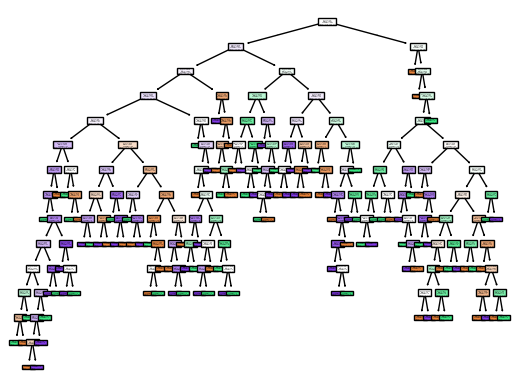

In [118]:
tree.plot_tree(classifier,filled=True)

In [124]:
classifier.predict([[200,11,27,2,4,30,1,1,	1,	1,	1,	0,	1]])

C:\Users\vepad\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Fatal crash'], dtype=object)

In [120]:
classifier.score(x,y)

1.0

In [121]:
from sklearn.model_selection import train_test_split

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [88]:
x_train

,Vehicle_Speed,Crash_Time,Age,Number_of_Lanes,Lane_Width,Speed_Limit,Gender,Vehicle_Type,Road_Type,Alcohol_Consumption,Crash_Type,Seatbelt_Usage,Road_Surface_Condition
134,43,23,44,1,3.408700,96,0,0,1,1,0,1,0
145,110,7,79,3,3.162553,71,0,2,1,0,0,0,0
63,52,20,74,2,3.475189,89,1,1,1,0,1,1,2
293,46,3,51,3,3.478685,54,0,1,1,0,1,0,0
285,89,22,21,3,3.437433,45,0,2,1,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,109,13,27,2,3.127840,64,1,2,1,0,0,1,0
192,53,11,56,2,3.042148,92,0,2,1,1,0,1,1
117,94,3,27,1,3.083247,58,0,2,1,0,1,1,2
47,41,10,34,2,3.387385,92,1,2,1,0,1,1,0


In [93]:
y_train

,Crash_Severity
134,Major injury
145,Major injury
63,Minor injury
293,Fatal crash
285,Fatal crash
...,...
251,Fatal crash
192,Major injury
117,Major injury
47,Minor injury


In [94]:
from sklearn.naive_bayes import GaussianNB

In [95]:
model=GaussianNB()

In [96]:
model.fit(x_train,y_train)

C:\Users\vepad\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [97]:
model.score(x_test,y_test)

0.3333333333333333

In [112]:
from sklearn.ensemble import RandomForestClassifier
rand=RandomForestClassifier(n_estimators=25)
rand.fit(x_train,y_train)

C:\Users\vepad\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=25)

In [113]:
rand.score(x_test,y_test)

0.38333333333333336